In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv(
    r'D:\OneDrivePersonal\OneDrive\Maestria\Proyecto Integrador\merged_data.csv',
    parse_dates=['timestamp']
)

# Eliminar las 20 primeras filas de cada símbolo
df = df.sort_values(by=['symbol', 'timestamp'])
df = df.groupby('symbol').apply(lambda x: x.iloc[20:]).reset_index(drop=True)



C:\Users\Usuario\AppData\Local\Temp\ipykernel_22928\2257450190.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('symbol').apply(lambda x: x.iloc[20:]).reset_index(drop=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225876 entries, 0 to 225875
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   symbol                   225876 non-null  object 
 1   timestamp                225876 non-null  object 
 2   open                     225876 non-null  float64
 3   high                     225876 non-null  float64
 4   low                      225876 non-null  float64
 5   close                    225876 non-null  float64
 6   close_adj                225876 non-null  float64
 7   volume                   225876 non-null  float64
 8   trade_count              225876 non-null  float64
 9   size_index               182454 non-null  object 
 10  sector_index             225876 non-null  object 
 11  range_rel_last1d         225876 non-null  float64
 12  rvol_20d                 225876 non-null  float64
 13  upper_wick_ratio_last1d  225876 non-null  float64
 14  lowe

In [34]:
df['timestamp'] = pd.to_datetime(df['timestamp'], yearfirst = True, utc = True)
df['date'] = df['timestamp'].dt.date

In [35]:
# Extraer mes y año
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

# Mapea los mese en español
month_map = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df['month'] = df['month'].map(month_map)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225876 entries, 0 to 225875
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   symbol                   225876 non-null  object             
 1   timestamp                225876 non-null  datetime64[ns, UTC]
 2   open                     225876 non-null  float64            
 3   high                     225876 non-null  float64            
 4   low                      225876 non-null  float64            
 5   close                    225876 non-null  float64            
 6   close_adj                225876 non-null  float64            
 7   volume                   225876 non-null  float64            
 8   trade_count              225876 non-null  float64            
 9   size_index               182454 non-null  object             
 10  sector_index             225876 non-null  object             
 11  range_rel_las

In [37]:
mapeo_sectores = {
    'SPSITN.INDX': 'Transporte',
    'SPSICH.INDX': 'Hardware Tecnológico',
    'SPSISS.INDX': 'Software y Servicios',
    'SPSISC.INDX': 'Semiconductores',
    'SPSIBI.INDX': 'Biotecnología',
    'SPSIIN.INDX': 'Industriales',
    'SPSIPH.INDX': 'Productos Farmacéuticos',
    'SPSIOP.INDX': 'Exploración y Producción de Petróleo y Gas',
    'SPSIHE.INDX': 'Equipos de Salud',
    'SPSIRE.INDX': 'Minorista (Retail)',
    'SPSIFB.INDX': 'Alimentos y Bebidas',
    'SPSIHP.INDX': 'Servicios de Salud',
    'SPSIAD.INDX': 'Aeroespacial y Defensa',
    'SPSIMM.INDX': 'Metales y Minería',
    'SPSITE.INDX': 'Telecomunicaciones',
    'SPSIOS.INDX': 'Equipos y Servicios de Petróleo y Gas',
    'SPSIBK.INDX': 'Bancos',
    'SPSICM.INDX': 'Mercados de Capitales',
    'SPSIHO.INDX': 'Constructores de Viviendas'
}

df['sector_index'] = df['sector_index'].map(mapeo_sectores)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225876 entries, 0 to 225875
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype              
---  ------                   --------------   -----              
 0   symbol                   225876 non-null  object             
 1   timestamp                225876 non-null  datetime64[ns, UTC]
 2   open                     225876 non-null  float64            
 3   high                     225876 non-null  float64            
 4   low                      225876 non-null  float64            
 5   close                    225876 non-null  float64            
 6   close_adj                225876 non-null  float64            
 7   volume                   225876 non-null  float64            
 8   trade_count              225876 non-null  float64            
 9   size_index               182454 non-null  object             
 10  sector_index             225876 non-null  object             
 11  range_rel_las

In [39]:
# Muestrame los unicos de size index
df['size_index'].unique()

array(['GSPC.INDX', 'MID.INDX', 'SML.INDX', nan], dtype=object)

In [40]:
size_mapping = {
    'GSPC.INDX': 'S&P 500',
    'MID.INDX': 'S&P MidCap 400',
    'SML.INDX': 'S&P SmallCap 600'
}

df['size_index'] = df['size_index'].map(size_mapping)
df['size_index'].unique()

array(['S&P 500', 'S&P MidCap 400', 'S&P SmallCap 600', nan], dtype=object)

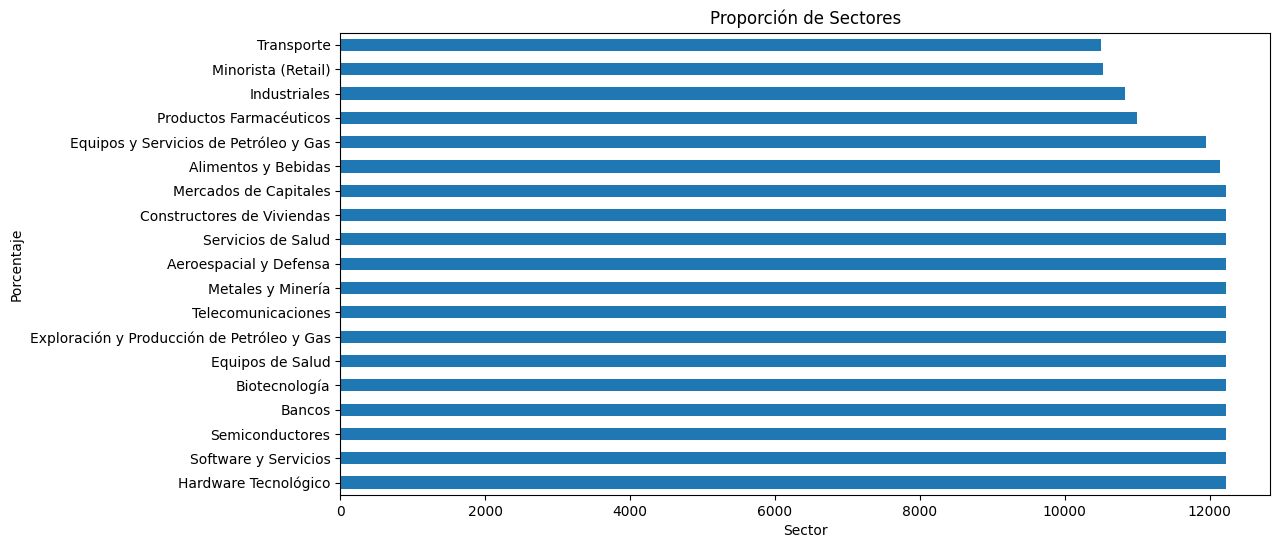

In [41]:
# Muestrame que porcentage de los datos es de cada sector
df['sector_index'].value_counts()
df['size_index'].value_counts()

# Grafica de sectores en un grafico de barras horizontal
plt.figure(figsize=(12, 6))
df['sector_index'].value_counts().plot(kind='barh')
plt.title('Proporción de Sectores')
plt.ylabel('Porcentaje')
plt.xlabel('Sector')
plt.show()

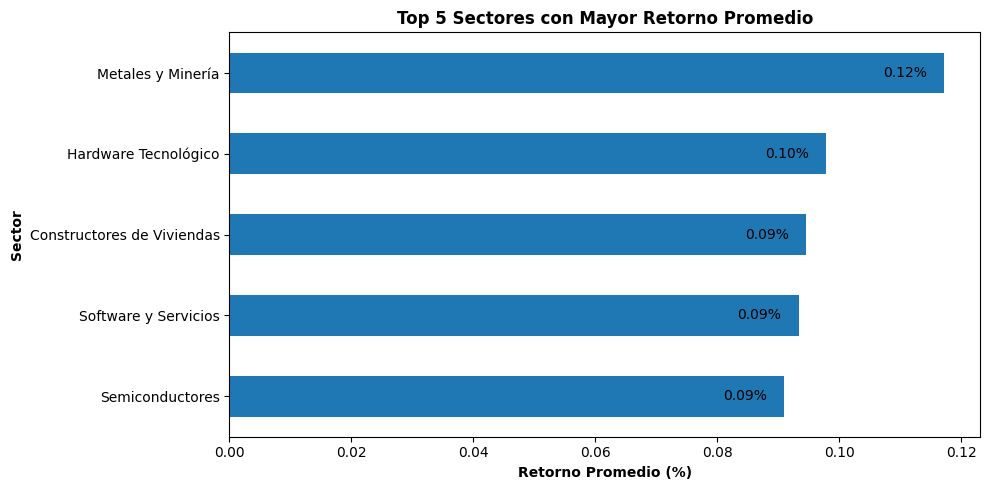

In [42]:
# Retorno promedio por sector
avg_return_by_sector = df.groupby('sector_index')['prev_day_return'].mean() * 100

# Top 5 sectores con mayor retorno promedio
top5 = avg_return_by_sector.sort_values(ascending=True).tail(5)

# Gráfico más alargado horizontalmente
plt.figure(figsize=(10, 5))   # <--- Ajusta aquí el ancho

# Gráfica
ax = top5.plot(kind='barh')

plt.title('Top 5 Sectores con Mayor Retorno Promedio', fontweight='bold')
plt.xlabel('Retorno Promedio (%)',fontweight='bold')
plt.ylabel('Sector',fontweight='bold')

# Agregar etiquetas con valor al final de cada barra
for i, v in enumerate(top5):
    ax.text(v - 0.01, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()



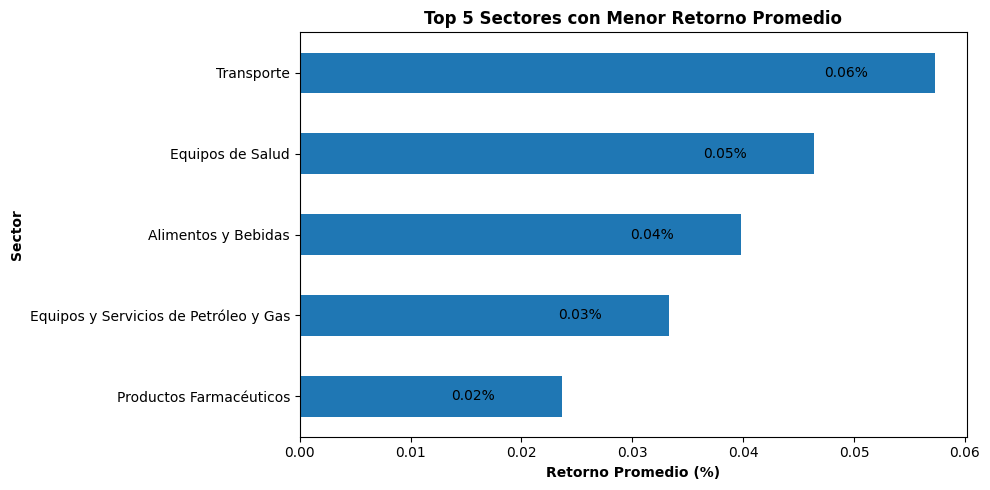

In [43]:
# Retorno promedio por sector
avg_return_by_sector = df.groupby('sector_index')['prev_day_return'].mean() * 100

# Top 5 sectores con menor retorno promedio
top5_ = avg_return_by_sector.sort_values(ascending=False).tail(5)
top5_ = top5_.sort_values(ascending=True)

# Gráfico más alargado horizontalmente
plt.figure(figsize=(10, 5))  # <--- Ajusta el ancho aquí

ax = top5_.plot(kind='barh')

plt.title('Top 5 Sectores con Menor Retorno Promedio', fontweight='bold')
plt.xlabel('Retorno Promedio (%)',fontweight='bold')
plt.ylabel('Sector',fontweight='bold')

# Agregar etiquetas con valor al final de cada barra
for i, v in enumerate(top5_):
    ax.text(v-0.01, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

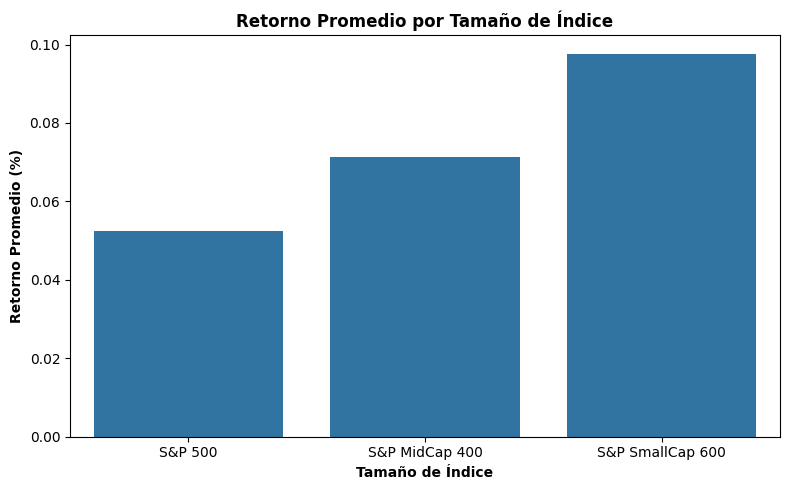

In [44]:
# Calcula y grafica el retorno promedio por tamaño de índice
avg_return_by_size = df.groupby('size_index')['prev_day_return'].mean() * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_return_by_size.index, y=avg_return_by_size.values)
plt.title('Retorno Promedio por Tamaño de Índice', fontweight='bold')
plt.xlabel('Tamaño de Índice',fontweight='bold')
plt.ylabel('Retorno Promedio (%)',fontweight='bold')
plt.tight_layout()
plt.show()

In [45]:
# Mapea los dias de la semana a sus nombres en español
mapeo_dias = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df['weekday'] = df['weekday'].map(mapeo_dias)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22928\2996072789.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


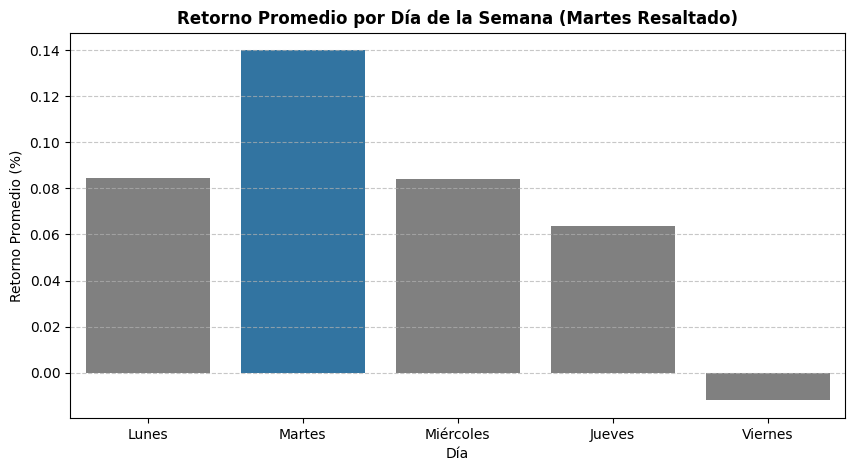

In [63]:
# --- 2. Preparación y Cálculo de Datos (Tu Código Original) ---
# Cálculo del retorno promedio y reindexación
avg_return_by_weekday = df.groupby('weekday')['prev_day_return'].mean() * 100
avg_return_by_weekday = avg_return_by_weekday.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'])

# --- 3. Definición de Colores para Resaltar ---
# Definir una paleta de colores: Martes en Azul, el resto en Gris
colors = []
highlight_color = '#1f77b4'  # Azul de seaborn
default_color = 'gray'       # Gris
days_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']

for day in days_order:
    if day == 'Martes':
        colors.append(highlight_color)
    else:
        colors.append(default_color)


# --- 4. Generación del Gráfico con Colores Personalizados ---
plt.figure(figsize=(10, 5))

# Usamos la paleta personalizada 'colors' en la función barplot
sns.barplot(
    x=avg_return_by_weekday.index, 
    y=avg_return_by_weekday.values,
    palette=colors # APLICA LA LISTA DE COLORES
)

plt.title('Retorno Promedio por Día de la Semana (Martes Resaltado)', fontweight='bold')
plt.xlabel('Día')
plt.ylabel('Retorno Promedio (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22928\2118695015.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


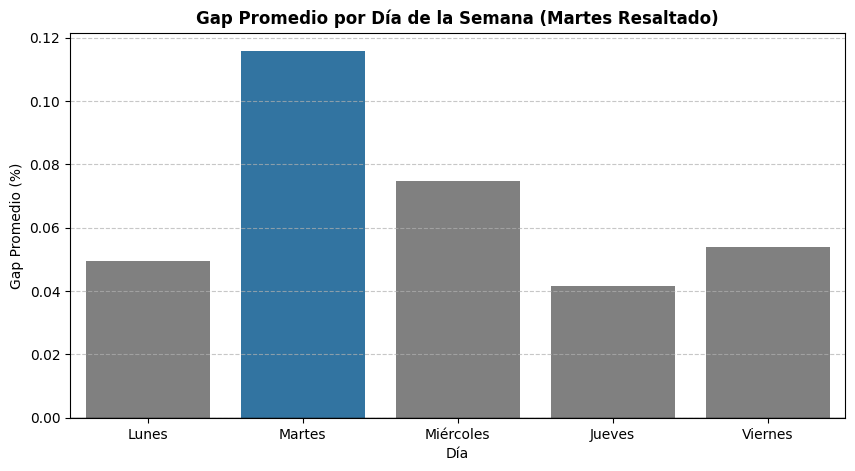

In [65]:
# --- 2. Preparación y Cálculo de Datos (Tu Código Original) ---
# Cálculo del Gap promedio y reindexación
avg_gap_by_weekday = df.groupby('weekday')['gap_pct'].mean() * 100
avg_gap_by_weekday = avg_gap_by_weekday.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'])

# --- 3. Definición de Colores para Resaltar ---
# Definir una paleta de colores: Martes en un color distintivo, el resto en Gris
colors = []
highlight_color = '#1f77b4'  # Azul de seaborn (bueno para señalar un Gap negativo/riesgo)
default_color = 'gray'       # Gris
days_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']

for day in days_order:
    if day == 'Martes':
        colors.append(highlight_color)
    else:
        colors.append(default_color)


# --- 4. Generación del Gráfico con Colores Personalizados ---
plt.figure(figsize=(10, 5))

# Usamos la paleta personalizada 'colors' en la función barplot
sns.barplot(
    x=avg_gap_by_weekday.index, 
    y=avg_gap_by_weekday.values,
    palette=colors # APLICA LA LISTA DE COLORES
)

# Línea de referencia del Gap Neutro (0%)
plt.axhline(0, color='black', linestyle='-', linewidth=1)

plt.title('Gap Promedio por Día de la Semana (Martes Resaltado)', fontweight='bold')
plt.xlabel('Día')
plt.ylabel('Gap Promedio (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

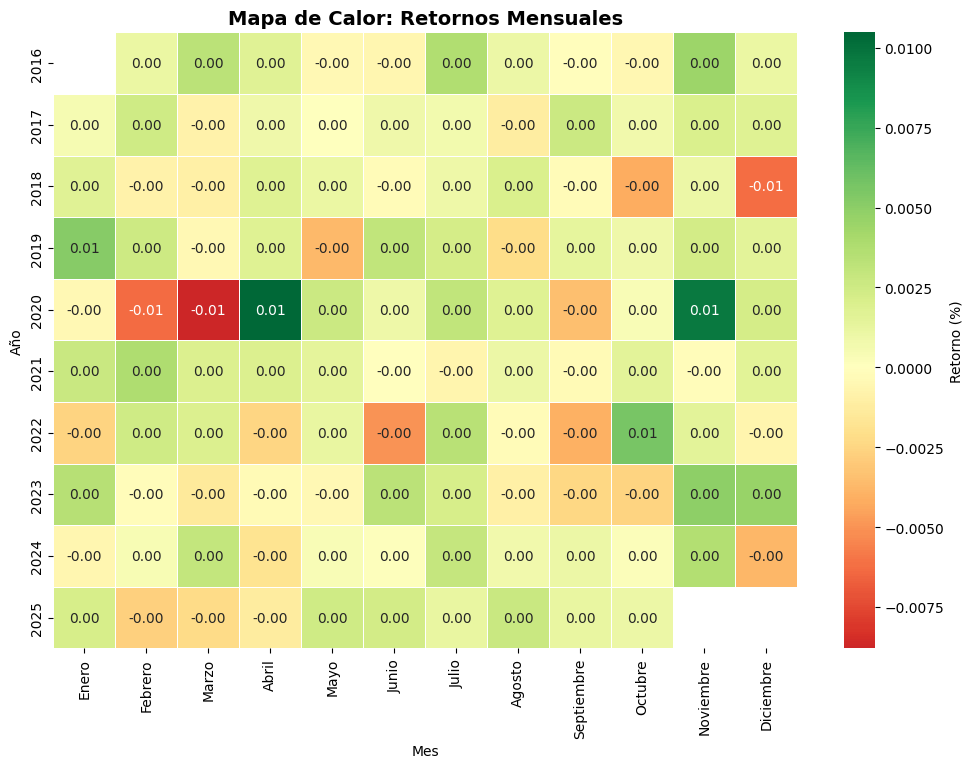

In [48]:
# Preparar datos: Crear una matriz Año vs Mes
pivot_table = df.pivot_table(index='year', columns='month', values='prev_day_return', aggfunc='mean')

plt.figure(figsize=(12, 8))

# Ordena los meses cronológicamente
ordered_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
pivot_table = pivot_table[ordered_months]

sns.heatmap(
    pivot_table, 
    annot=True,       # Muestra los valores numéricos
    fmt=".2f",        # Formato de 2 decimales
    cmap="RdYlGn",    # Rojo para negativo, Verde para positivo
    center=0,         # El color blanco será el 0
    linewidths=.5,    # Líneas entre cuadros
    cbar_kws={'label': 'Retorno (%)'}
)

plt.title('Mapa de Calor: Retornos Mensuales', fontweight='bold', fontsize=14)
plt.ylabel('Año')
plt.xlabel('Mes')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22928\449681429.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


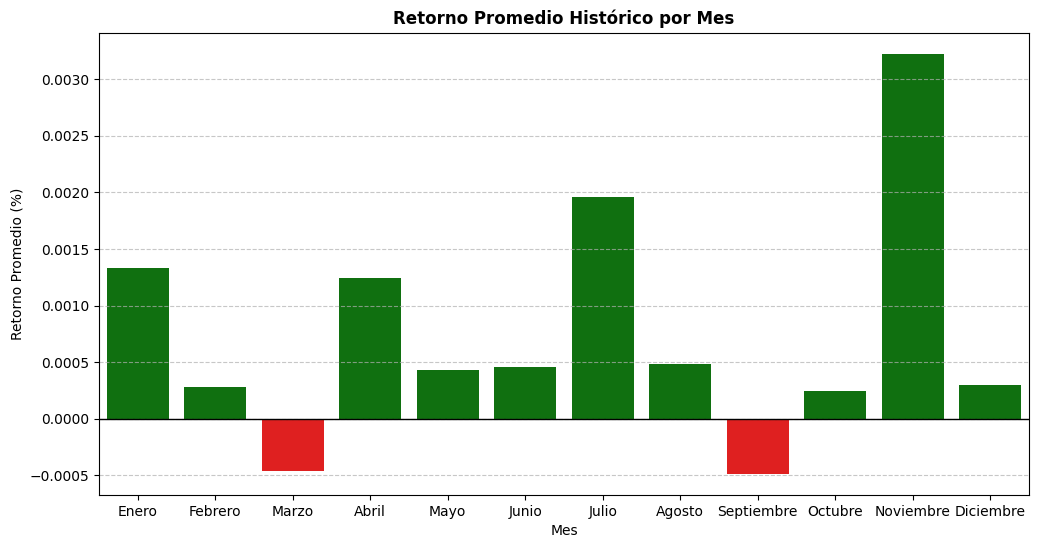

In [49]:
# --- 1. PRE-CALCULAR los datos agregados (¡Lo más rápido!) ---
# Calculamos la media de 'prev_day_return' para cada mes, resultando en 12 filas.
df_summary = df.groupby('month')['prev_day_return'].mean().reset_index()
df_summary.columns = ['month', 'mean_return'] # Renombrar para claridad

# ordena cronologicamente los meses
ordered_months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_summary['month'] = pd.Categorical(df_summary['month'], categories=ordered_months, ordered=True)
df_summary = df_summary.sort_values('month')

# --- 2. CALCULAR los colores basados en el resumen ---
# Usamos el DataFrame de resumen (solo 12 filas) para decidir los colores
colors = ['red' if x < 0 else 'green' for x in df_summary['mean_return']]

# --- 3. GRAFICAR los datos ya resumidos (¡Lo más eficiente!) ---
plt.figure(figsize=(12, 6))

# Usamos el DataFrame AGREGADO y especificamos la columna de retorno promedio
sns.barplot(
    data=df_summary,
    x='month',
    y='mean_return',
    palette=colors,
    # Quitar 'estimator=' porque ya estamos pasando el promedio
    # Quitar 'orient=' porque x e y están definidos correctamente
)

# 4. Ajustes estéticos
plt.axhline(0, color='black', linewidth=1)
plt.title('Retorno Promedio Histórico por Mes', fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Retorno Promedio (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

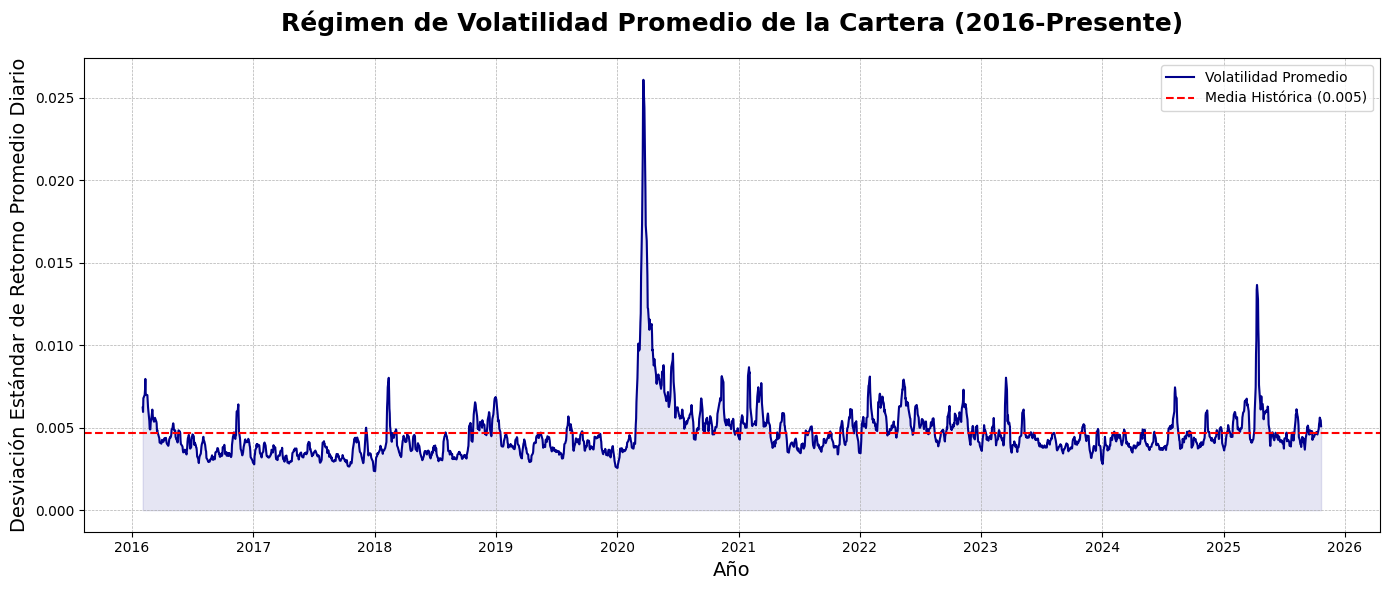

In [50]:
# Asumiendo que 'df' es tu DataFrame ya cargado y con la columna 'timestamp' como datetime.

# 1. Agregación: Calcula la media diaria de la volatilidad para todas las acciones
df_daily_avg = df.groupby('timestamp')['std_return_last5d'].mean().reset_index()

# 2. Gráfico
plt.figure(figsize=(14, 6))
plt.plot(df_daily_avg['timestamp'], df_daily_avg['std_return_last5d'], 
         label='Volatilidad Promedio', color='darkblue', linewidth=1.5)
plt.fill_between(df_daily_avg['timestamp'], df_daily_avg['std_return_last5d'], 
                 color='darkblue', alpha=0.1)

# Añadir una línea de volatilidad media histórica para referencia
historical_mean_std = df['std_return_last5d'].mean()
plt.axhline(historical_mean_std, color='red', linestyle='--', 
            label=f'Media Histórica ({historical_mean_std:.3f})')

plt.title('Régimen de Volatilidad Promedio de la Cartera (2016-Presente)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Desviación Estándar de Retorno Promedio Diario', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22928\2502483325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


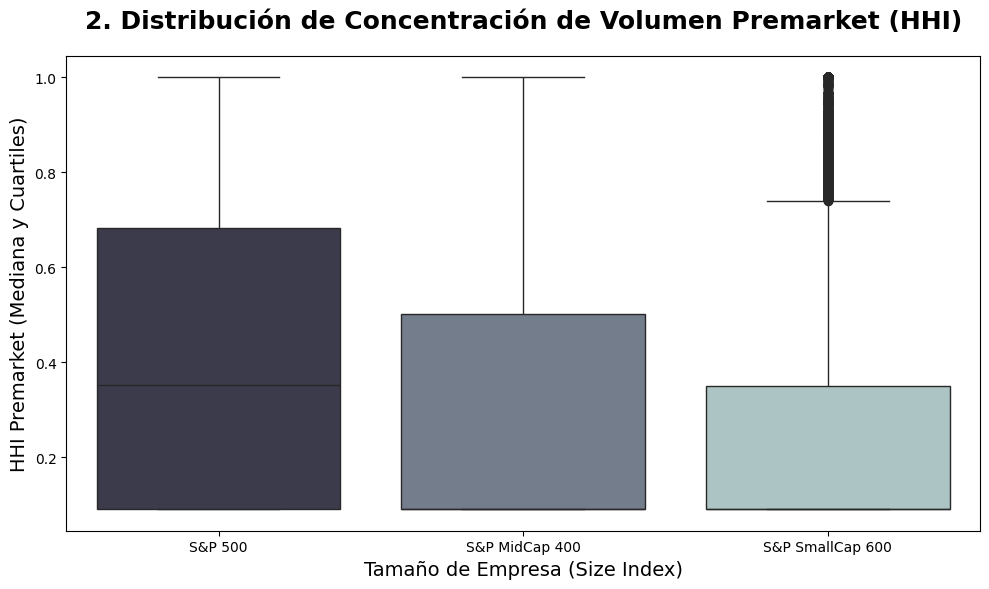

In [51]:
# 2. Concentración Premarket (HHI) por Tamaño de Empresa
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='size_index',
    y='hhi_premarket_volume',
    palette='bone'
)
plt.title('2. Distribución de Concentración de Volumen Premarket (HHI)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Tamaño de Empresa (Size Index)', fontsize=14)
plt.ylabel('HHI Premarket (Mediana y Cuartiles)', fontsize=14)
plt.tight_layout()
plt.show()

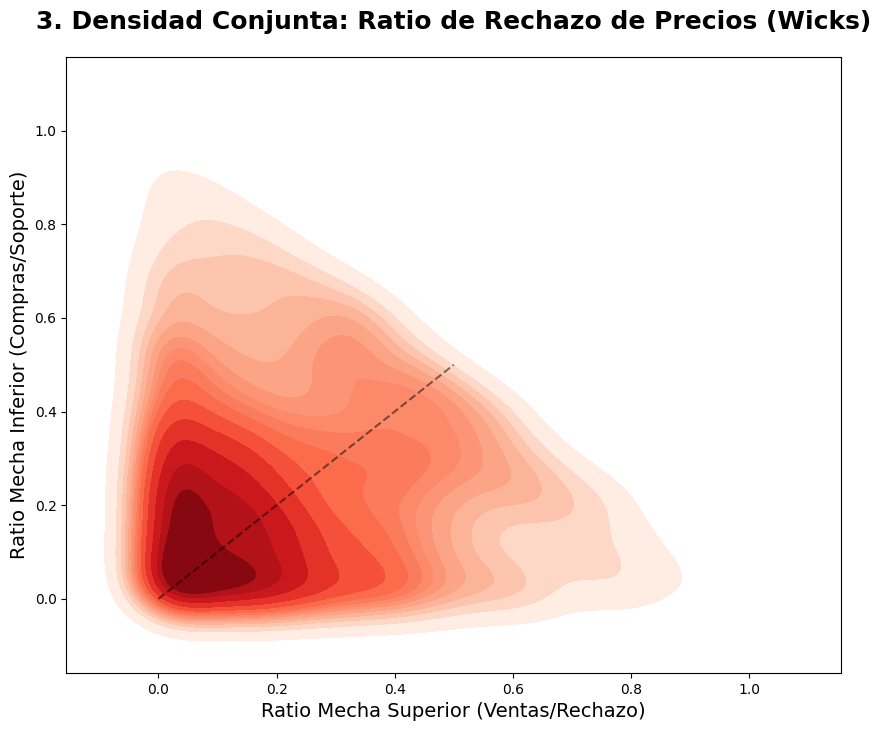

In [52]:
# 3. Presión de Venta vs. Compra (Wick Ratios)
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=df.sample(5000), 
    x='upper_wick_ratio_last1d', 
    y='lower_wick_ratio_last1d', 
    cmap='Reds', 
    fill=True,
    levels=15 # Más niveles para más detalle
)
plt.plot([0, 0.5], [0, 0.5], color='black', linestyle='--', alpha=0.5) # Línea de simetría (45 grados)

plt.title('3. Densidad Conjunta: Ratio de Rechazo de Precios (Wicks)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Ratio Mecha Superior (Ventas/Rechazo)', fontsize=14)
plt.ylabel('Ratio Mecha Inferior (Compras/Soporte)', fontsize=14)
#plt.tight_layout()
plt.show()

1. Zona de Mayor Densidad (El Comportamiento Típico)El color rojo más oscuro indica la combinación de ratios de mecha que ocurre con mayor frecuencia histórica en tu dataset.
- Ubicación: El pico de densidad se encuentra en la parte inferior izquierda, aproximadamente en (0.05, 0.15).
- Significado: La mayoría de los días de trading se caracterizan por tener:
    - Bajo Rechazo Superior (X ≈ 0.05): Poca presión vendedora significativa en los máximos.
    - Bajo a Moderado Rechazo Inferior (Y ≈ 0.15): Un poco más de presión compradora en los mínimos, pero aún baja.
- Conclusión de Trading: Esto sugiere que, la mayoría de las veces, las velas diarias tienden a tener cuerpos grandes o medianos en relación con sus mechas, lo que indica días de momentum definido (la presión que inició el movimiento tendió a prevalecer) o días con poco fighting interno.
2. La Línea de Simetría (Lucha Equilibrada)La línea discontinua diagonal muestra los días en que el rechazo superior fue igual al rechazo inferior ($X=Y$).
- Ubicación: La densidad disminuye rápidamente a medida que nos movemos a lo largo de esta línea.
- Significado: Días de indecisión perfectamente equilibrada son relativamente raros en tu dataset histórico. El mercado rara vez encuentra un balance perfecto entre la presión compradora y vendedora.
3. Asimetría y Sesgos Direccionales (La Clave del Insight)La forma alargada y sesgada de la nube de densidad es el insight más importante.
    - A. Zona Alcista (Dominio de Compradores)
        - Ubicación: La densidad se extiende significativamente arriba y a la izquierda de la línea de simetría (es decir, el eje Y es más alto que el eje X, hasta valores de Y ≈ 0.8 y X ≈ 0.2).
        - Condición: $\text{Ratio Mecha Inferior (Y)} > \text{Ratio Mecha Superior (X)}$
        - Significado: Es mucho más frecuente tener días donde los compradores intervienen con fuerza en los mínimos (alta mecha inferior) que días donde los vendedores intervienen con fuerza en los máximos. Esto sugiere que cuando el precio cae, la demanda está históricamente más dispuesta a defender el soporte que la oferta a defender la resistencia.
        - Implicación de Trading: Esto revela un sesgo alcista subyacente o una tendencia a la compra en caídas ("Buy the Dip") en tu universo de acciones. La presión de compra en el soporte es más fuerte y frecuente que la presión de venta en la resistencia.
    - B. Zona Bajista (Dominio de Vendedores)
        - Ubicación: La densidad se "adelgaza" y cae rápidamente debajo y a la derecha de la línea de simetría.
        - Condición: $\text{Ratio Mecha Superior (X)} > \text{Ratio Mecha Inferior (Y)}$
        - Significado: Los días donde la presión vendedora domina claramente a la compradora (ej. alta mecha superior con baja mecha inferior) son mucho menos comunes que el escenario contrario.
- 📝 Conclusiones para la Exposición
    1. "El Mercado Prefiere el Soporte": Tu universo de acciones muestra un sesgo asimétrico: cuando el precio se mueve, la presión compradora en los mínimos es históricamente más fuerte y frecuente que la presión vendedora en los máximos.
    2. "La Indecisión Pura es Rara": Los días donde compradores y vendedores luchan con la misma intensidad (en la línea de 45°) son poco frecuentes.
    3. "Patrón Dominante": El día más común (pico de densidad) es el que presenta un movimiento con relativamente poco rechazo, lo que valida la continuación del momentum intradía.

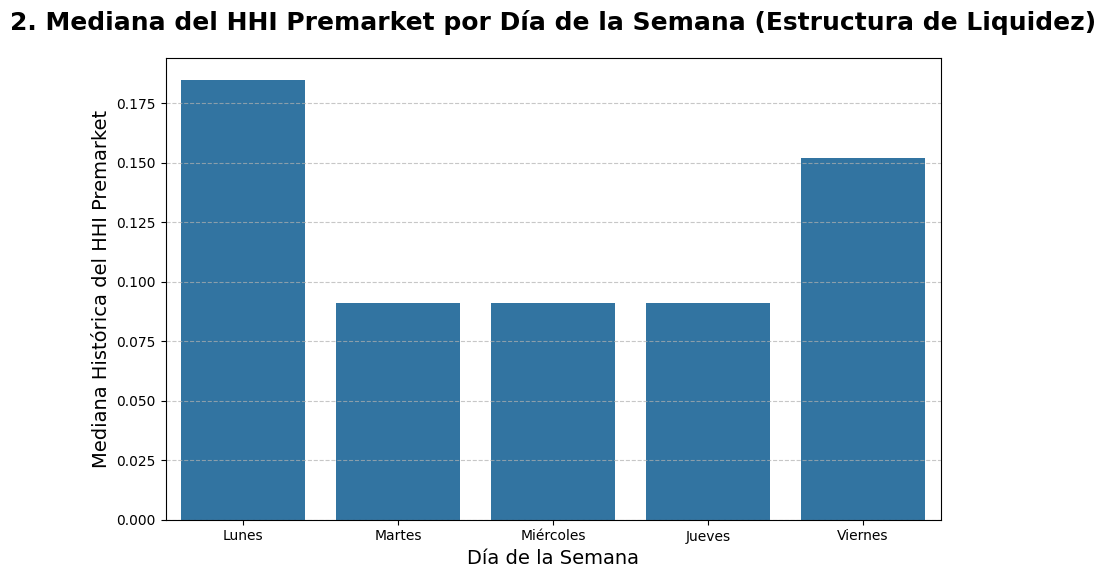

In [61]:
# 2. Estacionalidad del HHI por Día de la Semana

# 1. Preparación de datos
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']

# Calculamos la mediana del HHI por día
df_hhi_weekly = df.groupby('weekday')['hhi_premarket_volume'].median().reindex(day_order).reset_index()


# Incluye el grido
# 2. Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_hhi_weekly,
    x='weekday',
    y='hhi_premarket_volume',
)

plt.title('2. Mediana del HHI Premarket por Día de la Semana (Estructura de Liquidez)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Día de la Semana', fontsize=14)
plt.ylabel('Mediana Histórica del HHI Premarket', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

HHI (Índice Herfindahl-Hirschman): Mide la concentración de volumen.

- Alto HHI (Barra Alta): El volumen premarket está dominado por pocos participantes (pocas y grandes transacciones). El mercado es menos líquido y más fácil de mover con una sola orden grande. Implica mayor riesgo de manipulación o pánico.

- Bajo HHI (Barra Baja): El volumen premarket está distribuido entre muchos participantes (muchas y pequeñas transacciones). El mercado es más líquido y más eficiente.

Interpretación de la Mediana Histórica del HHI Semanal
La interpretación se basa en la altura de las barras: las barras más altas indican mayor concentración (menos participantes, menos eficiente), y las barras más bajas indican menor concentración (más participantes, más líquido y eficiente).

1. Días de Máxima Concentración y Riesgo (Lunes) 🚨
Lunes (Barra más Alta, aprox. 0.18): El lunes tiene, con diferencia, la mayor mediana histórica de HHI Premarket.

    - Insight Clave: El premarket es menos líquido y más frágil los lunes. El volumen está dominado por un número reducido de participantes (posiblemente fondos reaccionando a las noticias del fin de semana o una sola orden grande).

    - Implicación Operativa: Las señales generadas en el premarket del lunes (como gaps) son más susceptibles a ser movidas por grandes órdenes y tienen un mayor riesgo de ineficiencia o falsas rupturas una vez que abre el mercado regular.

2. Días de Mayor Eficiencia y Liquidez (Martes, Miércoles, Jueves) ✅
Martes, Miércoles, Jueves (Barra Baja y Estable, aprox. 0.09): Estos días muestran una mediana de HHI muy similar y baja.

    - Insight Clave: La liquidez y la participación del mercado se normalizan y alcanzan su nivel más eficiente y diversificado a mitad de semana. El volumen premarket se distribuye entre muchos más participantes.

    - Implicación Operativa: Las señales generadas en el premarket durante estos días tienden a ser más fiables, ya que reflejan un consenso más amplio y son menos propensas a ser impulsadas por una sola orden.

3. Incremento del Riesgo de Cierre (Viernes) ⚠️
Viernes (Barra Alta, aprox. 0.14): La concentración de volumen (HHI) aumenta significativamente en comparación con la mitad de la semana, aunque es menor que el lunes.

    - Insight Clave: Al acercarse el fin de semana, muchos participantes, especialmente el retail o los traders más pequeños, cierran o reducen posiciones. Esto disminuye el volumen total y hace que el volumen restante se concentre en menos manos (grandes fondos o participantes clave).

    - Implicación Operativa: La acción del precio premarket del viernes también debe tratarse con cautela, ya que puede estar impulsada por ajustes de riesgo en lugar de por un verdadero momentum de mercado.

In [55]:
df[df['days_since_holiday'].isna()]

,symbol,timestamp,open,high,low,close,close_adj,volume,trade_count,size_index,...,std_return_last5d,market_absolute_path,prev_day_return,gap_pct,dist_max_20d,pm_vwap_return,z_pm_comp,date,year,month
26895,BBWI,2021-08-31 08:00:00+00:00,68.89,68.9000,66.900,67.50,62.12,3443341.0,30975.0,S&P 500,...,0.003307,0.052207,0.008719,-0.002046,0.000000,-0.003615,-0.117806,2021-08-31,2021,Agosto
26896,BBWI,2021-09-01 08:00:00+00:00,67.32,68.5400,65.220,66.24,60.96,4605868.0,40587.0,S&P 500,...,0.003350,0.067194,-0.023731,-0.002415,-0.023731,-0.000184,0.185621,2021-09-01,2021,Septiembre
26897,BBWI,2021-09-02 08:00:00+00:00,66.50,66.9300,65.280,65.81,60.57,2467123.0,25930.0,S&P 500,...,0.004301,0.033572,-0.018674,0.003772,-0.041961,0.003937,-0.346445,2021-09-02,2021,Septiembre
26898,BBWI,2021-09-03 08:00:00+00:00,65.96,66.7000,64.390,65.70,60.47,2255755.0,28376.0,S&P 500,...,0.003929,0.035112,-0.006398,0.005132,-0.048091,-0.006981,-2.156725,2021-09-03,2021,Septiembre
174708,RYAN,2021-08-19 08:00:00+00:00,29.75,30.2500,29.540,30.25,29.74,591605.0,4588.0,NaN,...,0.003921,0.021715,0.009320,0.000684,-0.033069,0.000342,0.281104,2021-08-19,2021,Agosto
174709,RYAN,2021-08-20 08:00:00+00:00,30.63,31.2215,30.315,31.06,30.54,716630.0,5689.0,NaN,...,0.004103,0.036355,0.017100,0.000000,-0.016534,0.000000,0.223607,2021-08-20,2021,Agosto
174710,RYAN,2021-08-23 08:00:00+00:00,31.20,32.4300,31.110,32.18,31.64,737470.0,4756.0,NaN,...,0.004318,0.061242,0.026900,0.002943,0.000000,0.004257,0.223607,2021-08-23,2021,Agosto
174711,RYAN,2021-08-24 08:00:00+00:00,32.31,32.8800,31.940,32.80,32.25,289358.0,2655.0,NaN,...,0.003720,0.036474,0.036018,-0.001578,0.000000,0.000000,0.223607,2021-08-24,2021,Agosto
174712,RYAN,2021-08-25 08:00:00+00:00,32.94,32.9400,31.670,31.69,31.15,231760.0,2222.0,NaN,...,0.003878,0.044746,0.019279,0.001856,0.000000,0.004031,0.223607,2021-08-25,2021,Agosto
174713,RYAN,2021-08-26 08:00:00+00:00,31.62,32.2600,31.470,31.85,31.31,250251.0,2301.0,NaN,...,0.003972,0.041985,-0.034109,0.000000,-0.034109,0.000000,0.223607,2021-08-26,2021,Agosto


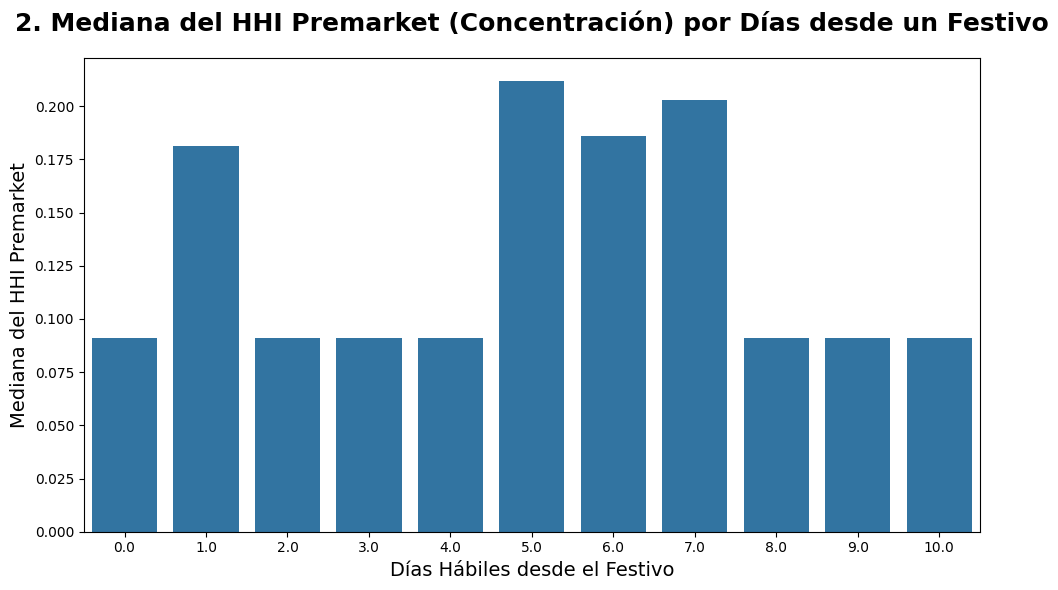

In [70]:
# 1. Preparación de datos: Eliminar NaNs en days_since_holiday
df_hhi_holiday = df[['days_since_holiday', 'hhi_premarket_volume']].dropna(subset=['days_since_holiday'])
df_hhi_holiday = df_hhi_holiday[df_hhi_holiday['days_since_holiday'] <= 10]

# 2. Agrupación: Mediana del HHI por días_desde_festivo
df_hhi_avg = df_hhi_holiday.groupby('days_since_holiday')['hhi_premarket_volume'].median().reset_index()

# 3. Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_hhi_avg,
    x='days_since_holiday',
    y='hhi_premarket_volume'
)

plt.title('2. Mediana del HHI Premarket (Concentración) por Días desde un Festivo', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Días Hábiles desde el Festivo', fontsize=14)
plt.ylabel('Mediana del HHI Premarket', fontsize=14)
plt.xticks(df_hhi_avg['days_since_holiday'].unique())
plt.tight_layout()
plt.show()

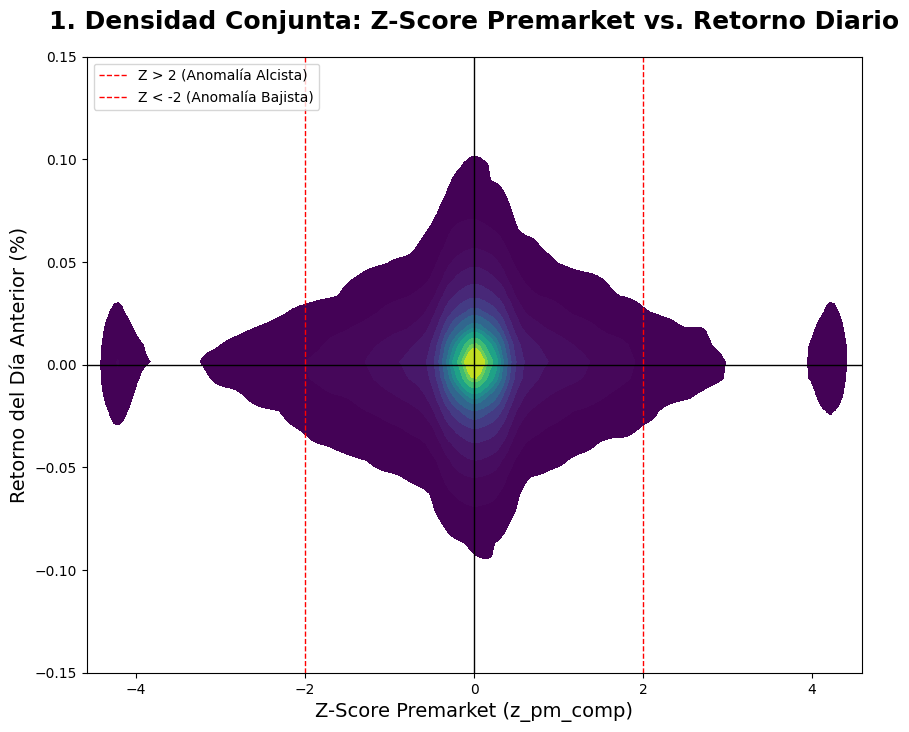

In [76]:
# 1. Preparación de datos: Muestrear para densidad y manejar posibles NaNs
df_zscore = df[['z_pm_comp', 'prev_day_return']].dropna()
#df_sample = df_zscore.sample(n=15000, random_state=42)

# 2. Gráfico
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=df_zscore, 
    x='z_pm_comp', 
    y='prev_day_return', 
    cmap='viridis', 
    fill=True,
    levels=15
)

# Líneas de referencia: Normalidad estadística (Z=0) y Retorno neutro (Y=0)
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.axvline(0, color='black', linestyle='-', linewidth=1)
plt.axvline(2.0, color='red', linestyle='--', linewidth=1, label='Z > 2 (Anomalía Alcista)')
plt.axvline(-2.0, color='red', linestyle='--', linewidth=1, label='Z < -2 (Anomalía Bajista)')

plt.title('1. Densidad Conjunta: Z-Score Premarket vs. Retorno Diario', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Z-Score Premarket (z_pm_comp)', fontsize=14)
plt.ylabel('Retorno del Día Anterior (%)', fontsize=14)
plt.legend(loc='upper left')
plt.ylim(-0.15, 0.15)
plt.show()

Conclusión Ejecutiva
La conclusión es que el Z-Score Premarket actúa como una herramienta de doble filtro para identificar el momentum direccional, pero con una advertencia crítica sobre el riesgo de reversión en los extremos.

1. La Zona de Máxima Oportunidad (Momentum Sólido) 🚀
El Z-Score es un predictor fuerte de momentum hasta que se vuelve excesivo.

Si una acción muestra una anomalía premarket moderada a fuerte (Z-Score entre +2 y +4 o -2 y -4), la densidad histórica sugiere que es altamente probable que esa dirección sea confirmada por el mercado durante el día de trading, generando un retorno positivo o negativo significativo.

Ejemplo: Un Z-Score de +3 es una señal de que el mercado se moverá hacia arriba ese día.

2. La Zona de Máxima Trampa (Reversión Extrema) 💥
Las anomalías premarket más extremas (Z-Score mayor a +4 o menor a -4) no son una señal de momentum, sino de reversión inminente.

Esta acción extrema de outliers indica una reacción exagerada o un pánico/euforia insostenible en el premarket, lo que provoca que el mercado reviente esa burbuja tan pronto como comienza la sesión regular.

Ejemplo: Un Z-Score de +5 es una señal de que el mercado está sobrecomprado, y es más probable que el precio caiga durante el día, anulando el movimiento premarket.

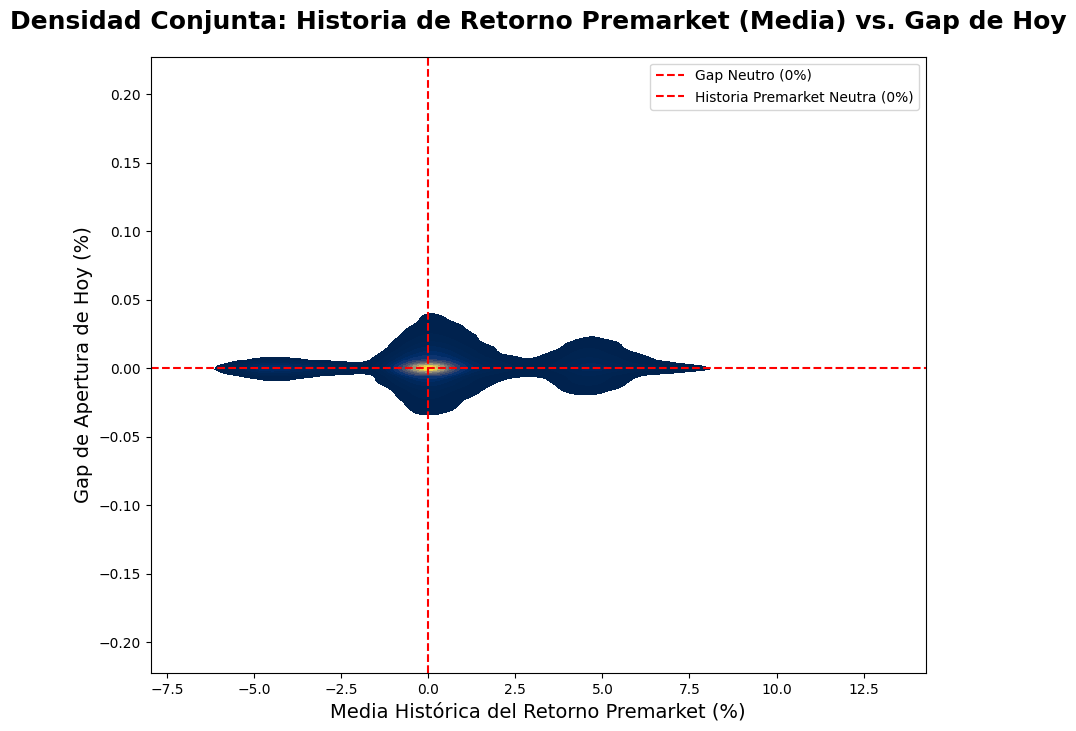

In [77]:
df_cln = df[['pm_rts_hist', 'gap_pct']].dropna()
df_smp = df_cln.sample(n=15000, random_state=42)

plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=df_smp, 
    x='pm_rts_hist', # Eje X: Media Histórica del Retorno Premarket (ej. 5 días)
    y='gap_pct',      # Eje Y: Gap de Apertura de Hoy
    cmap='cividis', 
    fill=True,
    levels=15
)

# Líneas de referencia: Retorno histórico neutro (X=0) y Gap neutro (Y=0)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Gap Neutro (0%)')
plt.axvline(0, color='red', linestyle='--', linewidth=1.5, label='Historia Premarket Neutra (0%)')

plt.title('Densidad Conjunta: Historia de Retorno Premarket (Media) vs. Gap de Hoy', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Media Histórica del Retorno Premarket (%)', fontsize=14)
plt.ylabel('Gap de Apertura de Hoy (%)', fontsize=14)
plt.legend(loc='upper right')
plt.show()